# Part 1 of the Machine Learning Project


To be submitted by **16/10/2024 23:59**

-> Total = **50** pts

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [14]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [15]:
## Change this part with your own dataset files

src_train = 'application_train.csv.zip'
src_test = 'application_test.csv.zip'

src_previous ='previous_application.csv.zip'
src_bureau = 'bureau.csv.zip'

# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally

app_train = pd.read_csv(src_train, compression="zip")
app_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [16]:
#Your code here
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past


# 1 - Loading the different datasets.
app_test = pd.read_csv(src_test, compression="zip")
bureau = pd.read_csv(src_bureau, compression="zip")
app_past =  pd.read_csv(src_previous, compression="zip")

# 2 - The number of rows and columns for each
print(f"app_train has the following shape: {app_train.shape} (number of rows, number of columns)")
print(f"app_test has the following shape: {app_test.shape} (number of rows, number of columns)")
print(f"bureau has the following shape: {bureau.shape} (number of rows, number of columns)")
print(f"app_past has the following shape: {app_past.shape} (number of rows, number of columns)")

app_train has the following shape: (307511, 122) (number of rows, number of columns)
app_test has the following shape: (48744, 121) (number of rows, number of columns)
bureau has the following shape: (1716428, 17) (number of rows, number of columns)
app_past has the following shape: (1670214, 37) (number of rows, number of columns)


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [17]:
# 3

## Your code here
# uncomment if you want more output 
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

#3.a
most_missing_app_test = app_test.isna().sum(axis=0).sort_values(ascending=False)
#UNCOMMENT NEXT LINE
#print(most_missing_app_test)
#If you only want to see the list of  columns missing  from data from highest to lowest
most_missing_app_test.index

#3.b
most_missing_bureau = bureau.isna().sum(axis=0).sort_values(ascending=False)
#UNCOMMENT NEXT LINE
#print(most_missing_bureau)
#If you only want to see the list of  columns missing  from data from highest to lowest
#most_missing_bureau.index

#3.c
most_missing_app_past = app_past.isna().sum(axis=0).sort_values(ascending=False)
#UNCOMMENT NEXT LINE
#print(most_missing_app_past)
#If you only want to see the list of  columns missing  from data from highest to lowest
#most_missing_app_past.index







In [18]:
# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

## Your code here

def deal_with_na(app_test):
    # Print initial stats
    print(f"Number of columns before processing: {len(app_test.columns)}")
    
    # Step 1: Drop columns with more than 50% missing values
    threshold = 0.5  # 50% threshold
    missing_percentage = app_test.isna().mean()  # Get the percentage of missing values for each column
    columns_to_drop = missing_percentage[missing_percentage > threshold].index  # Columns with >50% missing
    
    print(f"Number of columns to drop (more than 50% missing): {len(columns_to_drop)}")
    print(f"Columns dropped: {list(columns_to_drop)}")
    
    # Drop the columns from the dataframe
    app_test = app_test.drop(columns=columns_to_drop)
    
    # Step 2: Impute missing values for the remaining columns
    numerical_cols = app_test.select_dtypes(include=[np.number]).columns
    categorical_cols = app_test.select_dtypes(exclude=[np.number]).columns
    
    print(f"Number of numerical columns after dropping: {len(numerical_cols)}")
    print(f"Number of categorical columns after dropping: {len(categorical_cols)}")

    # Impute numerical columns with the median
    for col in numerical_cols:
        if app_test[col].isna().sum() > 0:
            median_val = app_test[col].median()
            app_test[col].fillna(median_val, inplace=True)

    # Impute categorical columns with the mode (most frequent value)
    for col in categorical_cols:
        if app_test[col].isna().sum() > 0:
            mode_val = app_test[col].mode()[0]
            app_test[col].fillna(mode_val, inplace=True)

    # Step 3: Check missing values after imputation
    missing_values_after = app_test.isna().sum()
    print("Missing values after imputation: ")
    print(missing_values_after[missing_values_after > 0])
    
    return app_test


# deal with missing data in test dataset
app_test = deal_with_na(app_test)


Number of columns before processing: 121
Number of columns to drop (more than 50% missing): 29
Columns dropped: ['OWN_CAR_AGE', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE']
Number of numerical columns after dropping: 77
Number of categorical columns after dropping: 15
Missing values after imputation: 
Series([], dtype: int64)


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique.

Explanation :
1. Identify if or which columns contain missing values (done in 3.a)

2. Seperate the columns, which contain missing values into numerical and categorical and imputate accordingly: 
    * Numerical Imputation:
        We impute missing values in numerical columns using the median. This is a good choice in my opinion because the median is less sensitive to outliers compared to the mean.

    * Categorical Imputation:
        For categorical columns, we impute missing values using the mode, which represents the most frequent category. Alternatively, we also could create a "Missing" category, but I think it makes more sense to use the mode. 

    * Be careful Data Leakage:
        I ensure that no future information (e.g., test labels or features) is used during the imputation process. The imputation strategy is purely based on the available data within the app_test dataset itself, so no leakage from other datasets occurs.

3. Ensure that no missing values remain in the dataset

## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2pts
* 6.a: code 3pt
* 6.b: code 3pts

TARGET
0    282686
1     24825
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

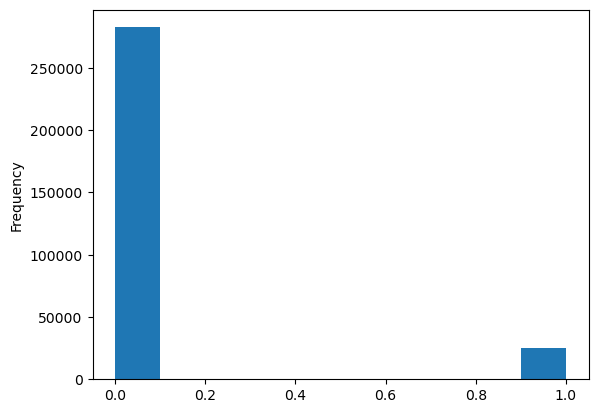

In [19]:
# 5 - value counts
print(app_train['TARGET'].value_counts())

# 5 - histograms
app_train['TARGET'].astype(int).plot.hist()

**5**: Describe briefly your observation 

There is a significant imbalance between the two classes as you can see in the histogram plot. The class 0 is overrepresented with a total of 282686 in contrast to class 1 which is underrepresented with only 24825.  

In [20]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/

## Your code here
app_train_original = app_train.copy()


# 6.a - fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

# Check the imbalance in the target class
target_counts = app_train_original['TARGET'].value_counts()
majority_class = target_counts.idxmax()
minority_class = target_counts.idxmin()


# Split data into majority and minority classes
majority_df = app_train_original[app_train_original['TARGET'] == majority_class]
minority_df = app_train_original[app_train_original['TARGET'] == minority_class]

# Oversample the minority class to match the size of the majority class
minority_oversampled = minority_df.sample(len(majority_df), replace=True, random_state=42)

# Combine majority class and oversampled minority class
app_train_balanced = pd.concat([majority_df, minority_oversampled], axis=0)

# Shuffle the dataframe to mix both classes
app_train_balanced = app_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check if the dataset is now balanced
balanced_counts = app_train_balanced['TARGET'].value_counts()
print("Class distribution after oversampling:")
print(balanced_counts)




Class distribution after oversampling:
TARGET
0    282686
1    282686
Name: count, dtype: int64


In [21]:
# 6.b - fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
# Make sure to select the appropriate SMOTE variant.


## Your code here
from imblearn.over_sampling import SMOTENC

app_train_smote = deal_with_na(app_train_original.copy()) # copy and fix missing values just like in the test dataset

# Separate features and target variable
X = app_train_smote.drop(columns='TARGET', axis=1)
y = app_train_smote['TARGET']
print(X.shape)
categorical_cols = app_train_smote.select_dtypes(include=['object', 'category']).columns
categorical_features = [X.columns.get_loc(col) for col in categorical_cols]  
smote = SMOTENC(categorical_features,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data back into a dataframe
app_train_smote = pd.DataFrame(X_resampled, columns=X.columns)
app_train_smote['TARGET'] = y_resampled

# Check if the dataset is now balanced
smote_counts = app_train_smote['TARGET'].value_counts()
print("Class distribution after SMOTE:")
print(smote_counts)

# 
# We will use the dataframe app_train from 6.a in the following

Number of columns before processing: 122
Number of columns to drop (more than 50% missing): 41
Columns dropped: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
Number of numerical columns after dropping: 68
Number of categorical colum

<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [24]:
#7a
app_train_balanced['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'With parents',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [23]:
app_train_balanced['CODE_GENDER'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [ ]:
#8


<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [ ]:
## Your code here

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [ ]:
## Your code here

##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

